# ДЗ №3 Гладышев В.В.

## Задание № 4

a) Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

In [3]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [4]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])

In [5]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Значение         2667 non-null   float64
 1   year             2667 non-null   int64  
 2   month            2667 non-null   int64  
 3   dayofmonth       2667 non-null   int64  
 4   quarter          2667 non-null   int64  
 5   dayofyear        2667 non-null   int64  
 6   weekofyear       2667 non-null   int64  
 7   dayofweek        2667 non-null   int64  
 8   is_holiday       2667 non-null   int64  
 9   is_prev_holiday  2667 non-null   int64  
 10  is_next_holiday  2667 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 250.0 KB


In [6]:
brent_data_w = brent_data.resample('W').mean()

In [7]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Значение         469 non-null    float64
 1   year             469 non-null    float64
 2   month            469 non-null    float64
 3   dayofmonth       469 non-null    float64
 4   quarter          469 non-null    float64
 5   dayofyear        469 non-null    float64
 6   weekofyear       469 non-null    float64
 7   dayofweek        469 non-null    float64
 8   is_holiday       469 non-null    float64
 9   is_prev_holiday  469 non-null    float64
 10  is_next_holiday  469 non-null    float64
dtypes: float64(11)
memory usage: 44.1 KB


In [8]:
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [9]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


In [10]:
brent_data_w.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.00000,469.000000,469.000000,469.000000,469.000000
mean,80.712938,2014.668799,6.534790,15.769225,2.510448,183.502452,26.54371,2.517662,0.027505,0.027150,0.030419
std,26.661299,2.627031,3.410980,7.038383,1.105197,104.223962,15.04838,0.316618,0.063859,0.064381,0.068258
min,28.690000,2010.000000,1.000000,3.000000,1.000000,4.200000,1.00000,1.500000,0.000000,0.000000,0.000000
25%,56.206000,2012.000000,4.000000,9.666667,2.000000,93.666667,14.00000,2.500000,0.000000,0.000000,0.000000
50%,76.601667,2015.000000,6.833333,16.000000,2.800000,183.666667,27.00000,2.666667,0.000000,0.000000,0.000000
75%,108.114000,2017.000000,9.333333,22.000000,3.333333,272.666667,39.00000,2.666667,0.000000,0.000000,0.000000
max,125.006667,2019.000000,12.000000,29.500000,4.000000,363.500000,53.00000,4.333333,0.200000,0.250000,0.250000


In [11]:
type(brent_data['Значение'].values)

numpy.ndarray

In [12]:
np.shape(brent_data['Значение'].values)

(2667,)

In [13]:
type(brent_data_w['Значение'].values)

numpy.ndarray

In [14]:
np.shape(brent_data_w['Значение'].values)

(470,)

In [15]:
brent_data['Значение'].values

array([76.37, 76.89, 76.57, ..., 60.37, 59.19, 58.84])

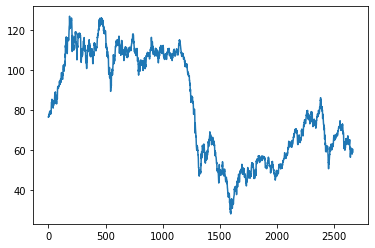

In [16]:
plt.plot( brent_data['Значение'].values )

In [17]:
brent_data_w['Значение'].values

array([ 76.616     ,  77.67333333,  78.69333333,  78.51833333,
        81.21166667,  84.14666667,  83.49833333,  82.795     ,
        83.36166667,  87.00333333,  87.77666667,  84.76833333,
        85.07333333,  89.31166667,  90.954     ,  91.63666667,
        93.53833333,  93.96833333,  94.558     ,  97.83333333,
        97.44      ,  97.71333333, 101.12166667, 101.03666667,
       103.03666667, 110.68666667, 115.305     , 114.45      ,
       112.93166667, 115.565     , 116.248     , 123.38333333,
       122.57      , 123.078     , 124.78833333, 116.16666667,
       113.86833333, 111.495     , 113.438     , 115.54833333,
       117.29833333, 115.18833333, 109.14333333, 110.51166667,
       115.57166667, 116.98166667, 117.72166667, 117.425     ,
       111.72833333, 106.16833333, 108.84333333, 110.20166667,
       113.29166667, 112.36666667, 110.94666667, 107.10666667,
       103.87833333, 103.47666667,          nan, 109.75666667,
       110.68      , 110.82      , 113.225     , 109.56

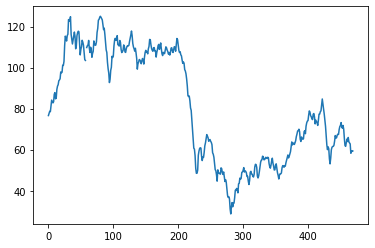

In [18]:
plt.plot( brent_data_w['Значение'].values )

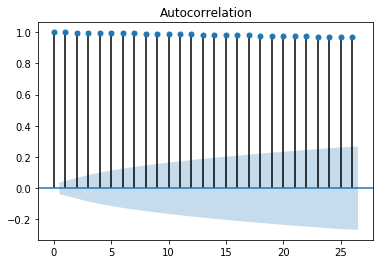

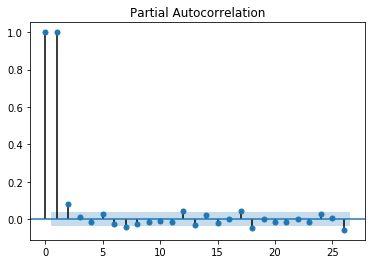

In [19]:
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=26)
plt.show()

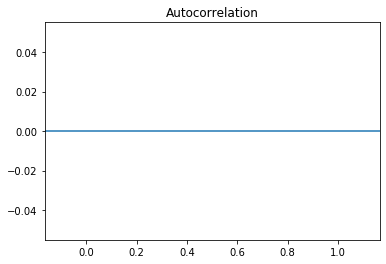

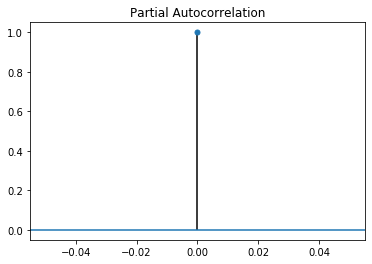

In [20]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=26)
plt.show()

### Вопрос - почему ТАК!?

### А не так:

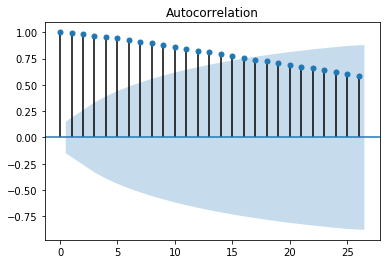

C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


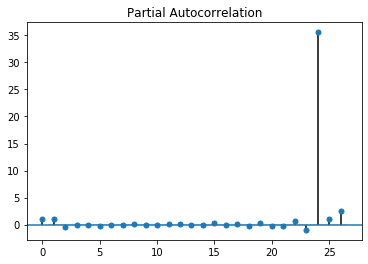

In [21]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values[150:-150], lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values[150:-150], lags=26)
plt.show()

In [23]:
brent_data_w[brent_data_w['Значение'].isnull()].index

DatetimeIndex(['2011-10-16'], dtype='datetime64[ns]', name='Дата', freq='W-SUN')

#### Вот же она - ловушка :)

In [24]:
brent_data_w.loc['2011-10-16', 'Значение']

nan

In [25]:
brent_data_w.loc['2011-10-01':'2011-10-30', 'Значение']

Дата
2011-10-02    103.878333
2011-10-09    103.476667
2011-10-16           NaN
2011-10-23    109.756667
2011-10-30    110.680000
Freq: W-SUN, Name: Значение, dtype: float64